In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
sales = pd.read_csv('advertising.csv')
sales.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [51]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


It seem no data is missing and all variables are formmated with right data type

In [52]:
sales.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


#### 1. Standardising column names

In [53]:
sales.columns = sales.columns.str.lower().str.strip()

In [54]:
sales.columns

Index(['tv', 'radio', 'newspaper', 'sales'], dtype='object')

#### checking for any empty rows

In [55]:
sales.isna().sum()

tv           0
radio        0
newspaper    0
sales        0
dtype: int64

This shows there are no empty rows for all variables

### 2.Let us check the correlation with price

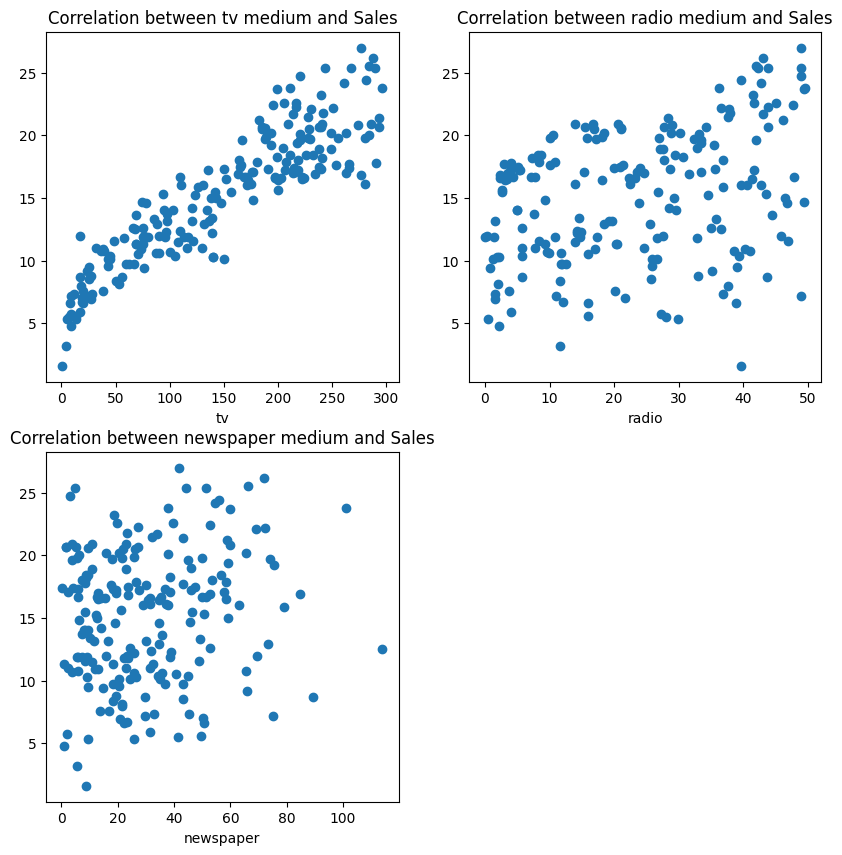

In [56]:
def corrplot(column,figurenum):
    plt.subplot(2,2,figurenum)
    plt.scatter(sales[column], sales['sales'])
    plt.xlabel(column)
    plt.title('Correlation between {0} medium and Sales'.format(column))

plt.figure(figsize= (10,10))
corrplot('tv',1)
corrplot('radio',2)
corrplot('newspaper',3)

#### Above plots show that there is strong correlation for TV compared to other

### 3. Strength of correlation with price

<Axes: >

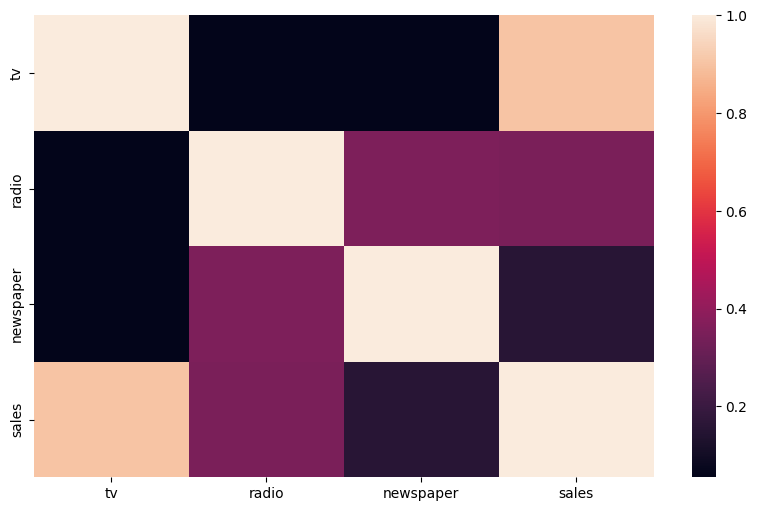

In [57]:
plt.figure(figsize= (10,6))
sns.heatmap(sales.corr(method= 'pearson'))

#### Performed looping to avoid confusion with table format provide by df.corr() method

In [58]:
col = []
target = 'sales'
for variable in sales.columns:
    if variable != target:
        coefficient = sales['sales'].corr(sales[variable])
        print(f'Correlation coefficient between {variable} and sales = {coefficient} ')
    if coefficient> 0.7:
        col.append(variable)

print('\nvariables having high correlation with sales are {}'.format(col))
 

Correlation coefficient between tv and sales = 0.9012079133023305 
Correlation coefficient between radio and sales = 0.3496310970076693 
Correlation coefficient between newspaper and sales = 0.1579600261549263 

variables having high correlation with sales are ['tv']


Heat map and above table clearly shows only strong relation exists between tv and sales.

To get close estimate for sales only TV as a mode of promotion is suitable for the company

#### 4. Using Linear regression to predict sales

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = sales[['sales']]
y= sales['tv']

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size= 0.7, test_size= 0.3, random_state= 0)

linear_reg1 = LinearRegression()

linear_reg1.fit(X_train,y_train)

#y_pred = linear_reg1.predict(y_test)

LinearRegression()

In [60]:
linear_reg1.score(X_train,y_train)

0.8059411537112771

Train model gives an r square value of 0.80594

In [61]:
y_pred = linear_reg1.predict(X_test)

In [62]:
from sklearn.metrics import r2_score

r2_score(y_test,y_pred)


0.8167550083655044

It shows there is a 81% chance that model can predict sales based on spend given. Let us plot to check the values predicted by mode

Text(0.5, 1.0, 'Original data with Regression plot')

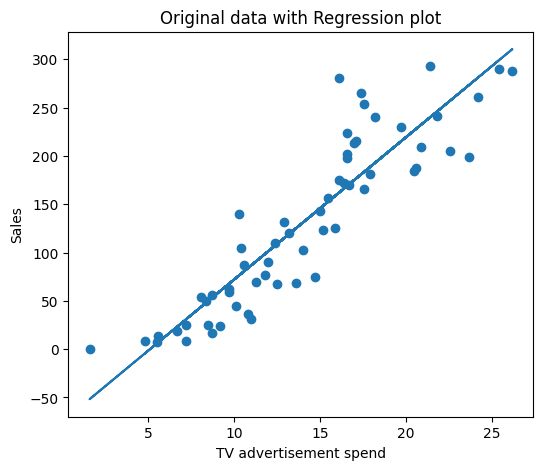

In [71]:
plt.figure(figsize=(6,5))

plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred)
plt.xlabel('TV advertisement spend')
plt.ylabel('Sales')
plt.title('Original data with Regression plot')

Residual plot

Text(0.5, 1.0, 'Residual plot')

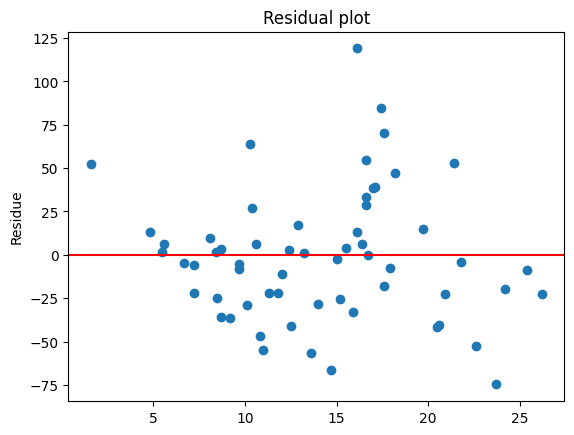

In [72]:
y_residue = y_test - y_pred
plt.axhline(y=0, color = 'red')
plt.scatter(X_test,y_residue)
plt.ylabel('Residue')
plt.title('Residual plot')

Resid plot shows no pattern is present around the line